# Kartikeya Gaur
# GRIPSEPT21
# Data Science and Business Analytics
# Task 2 - Prediction using Unsupervised Machine Learning

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets

In [3]:
#Loadding dataset
iris = datasets.load_iris()
iris_DataFrame = pd.DataFrame(iris.data, columns = iris.feature_names)
iris_DataFrame.head(15)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [4]:
#Finding the optimum number of clusters for k-means classification

x = iris_DataFrame.iloc[:, [0,1,2,3]].values

from sklearn.cluster import KMeans
sum_square = []

for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    sum_square.append(kmeans.inertia_)

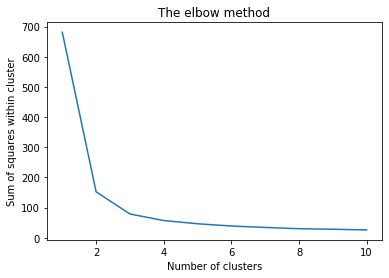

In [5]:
#Plotting the results on graph to onserve the "Elbow". 

plt.plot(range(1,11),sum_square)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squares within cluster')
plt.show()

In [6]:
#Creating the kmeans classifier - Applying kmeans to the dataset

kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

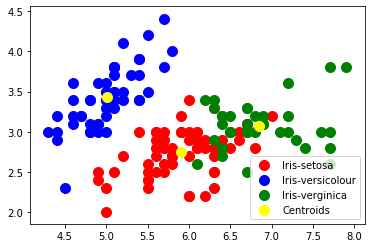

In [7]:
#Visualization of the clusters

plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = 'red' , label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = 'blue' , label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = 'green' , label = 'Iris-verginica')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow' , label = 'Centroids')
plt.legend()